In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# <font color=blue>DATA LOAD <font>

In [86]:
df = pd.read_csv('recording_export_3266351_3314644_2022-12-14T17-29-05.csv') 
print(df)

                                         Recording URL  Publicly Shared  \
0    https://insights.hotjar.com/r?site=3266351&rec...             True   
1    https://insights.hotjar.com/r?site=3266351&rec...            False   
2    https://insights.hotjar.com/r?site=3266351&rec...            False   
3    https://insights.hotjar.com/r?site=3266351&rec...            False   
4    https://insights.hotjar.com/r?site=3266351&rec...            False   
..                                                 ...              ...   
579  https://insights.hotjar.com/r?site=3266351&rec...            False   
580  https://insights.hotjar.com/r?site=3266351&rec...            False   
581  https://insights.hotjar.com/r?site=3266351&rec...            False   
582  https://insights.hotjar.com/r?site=3266351&rec...            False   
583  https://insights.hotjar.com/r?site=3266351&rec...            False   

     Already Watched  Comments  Labels              Created New / Returning  \
0               True

In [87]:
df.head()

,Recording URL,Publicly Shared,Already Watched,Comments,Labels,Created,New / Returning,Hotjar User ID,Country,Action Count,...,Browser,Operating System,Referrer URL,Landing Page URL,Exit Page URL,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Events
0,https://insights.hotjar.com/r?site=3266351&rec...,True,True,NaN,NaN,2022-12-02T15:32:23,New user,bc57d727,ZA,55,...,Google,Ios,NaN,https://app.getbird.bio/recipe/gin-gle-bells-g...,https://app.getbird.bio/the_lean_girl?tab=recipes,False,True,NaN,NaN,NaN
1,https://insights.hotjar.com/r?site=3266351&rec...,False,True,NaN,NaN,2022-12-02T14:41:17,Returning user,5cc8abea,ZA,77,...,Safari,Ios,NaN,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...,False,False,NaN,NaN,NaN
2,https://insights.hotjar.com/r?site=3266351&rec...,False,True,NaN,NaN,2022-12-04T09:06:45,New user,c5065b41,ZA,3,...,Chrome,Android,https://linktr.ee/,https://app.getbird.bio/the_flavourist?utm_med...,https://app.getbird.bio/the_flavourist?utm_med...,False,False,NaN,NaN,NaN
3,https://insights.hotjar.com/r?site=3266351&rec...,False,False,NaN,NaN,2022-12-04T10:02:47,New user,bf1f7067,ZA,4,...,Chrome,Ios,https://getbird.bio/,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...,False,False,NaN,NaN,NaN
4,https://insights.hotjar.com/r?site=3266351&rec...,False,False,NaN,NaN,2022-12-04T10:35:23,New user,1834aad2,ZA,9,...,Instagram,Android,NaN,https://app.getbird.bio/the_lean_girl,https://app.getbird.bio/the_lean_girl,False,False,NaN,NaN,NaN


# <font color = red> drop feature that are not required in our data <font>

In [88]:
df1 = df.drop(['Recording URL', 'Publicly Shared' , 'Already Watched' , 'Comments' , 'Labels' , 'Rage Clicked','U-Turned','Incoming Feedback','Net Promoter Score®','Events'], axis='columns')
df1.head()

,Created,New / Returning,Hotjar User ID,Country,Action Count,Page Count,Duration (seconds),Device,Device Screen Size,Browser,Operating System,Referrer URL,Landing Page URL,Exit Page URL
0,2022-12-02T15:32:23,New user,bc57d727,ZA,55,14,126,Phone,375 X 530,Google,Ios,NaN,https://app.getbird.bio/recipe/gin-gle-bells-g...,https://app.getbird.bio/the_lean_girl?tab=recipes
1,2022-12-02T14:41:17,Returning user,5cc8abea,ZA,77,11,232,Phone,375 X 548,Safari,Ios,NaN,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...
2,2022-12-04T09:06:45,New user,c5065b41,ZA,3,1,13,Phone,360 X 643,Chrome,Android,https://linktr.ee/,https://app.getbird.bio/the_flavourist?utm_med...,https://app.getbird.bio/the_flavourist?utm_med...
3,2022-12-04T10:02:47,New user,bf1f7067,ZA,4,1,3,Phone,428 X 751,Chrome,Ios,https://getbird.bio/,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...
4,2022-12-04T10:35:23,New user,1834aad2,ZA,9,6,16,Phone,412 X 836,Instagram,Android,NaN,https://app.getbird.bio/the_lean_girl,https://app.getbird.bio/the_lean_girl


In [89]:
df1.shape

(584, 14)

### Display summary

In [90]:
df1.describe()

,Action Count,Page Count,Duration (seconds)
count,584.000000,584.000000,584.000000
mean,14.803082,3.481164,94.174658
std,14.973754,3.190303,206.865317
min,1.000000,1.000000,0.000000
25%,5.000000,1.000000,25.000000
50%,10.000000,3.000000,55.000000
75%,21.000000,4.000000,103.000000
max,148.000000,30.000000,3730.000000


## Null value identification

In [91]:
df1.isnull().sum()

Created                 0
New / Returning         0
Hotjar User ID          0
Country                 1
Action Count            0
Page Count              0
Duration (seconds)      0
Device                  0
Device Screen Size      0
Browser                 0
Operating System        0
Referrer URL          168
Landing Page URL        0
Exit Page URL           0
dtype: int64

#### Droping Null  values

In [92]:
df2 = df1.dropna()

In [93]:
df2.isnull().sum()

Created               0
New / Returning       0
Hotjar User ID        0
Country               0
Action Count          0
Page Count            0
Duration (seconds)    0
Device                0
Device Screen Size    0
Browser               0
Operating System      0
Referrer URL          0
Landing Page URL      0
Exit Page URL         0
dtype: int64

## Information about Dataset

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 2 to 583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Created             415 non-null    object
 1   New / Returning     415 non-null    object
 2   Hotjar User ID      415 non-null    object
 3   Country             415 non-null    object
 4   Action Count        415 non-null    int64 
 5   Page Count          415 non-null    int64 
 6   Duration (seconds)  415 non-null    int64 
 7   Device              415 non-null    object
 8   Device Screen Size  415 non-null    object
 9   Browser             415 non-null    object
 10  Operating System    415 non-null    object
 11  Referrer URL        415 non-null    object
 12  Landing Page URL    415 non-null    object
 13  Exit Page URL       415 non-null    object
dtypes: int64(3), object(11)
memory usage: 48.6+ KB


In [95]:
df2.columns

Index(['Created', 'New / Returning', 'Hotjar User ID', 'Country',
       'Action Count', 'Page Count', 'Duration (seconds)', 'Device',
       'Device Screen Size', 'Browser', 'Operating System', 'Referrer URL',
       'Landing Page URL', 'Exit Page URL'],
      dtype='object')

In [96]:
df2.nunique()

Created               415
New / Returning         2
Hotjar User ID        396
Country                 6
Action Count           51
Page Count             15
Duration (seconds)    161
Device                  3
Device Screen Size    198
Browser                 5
Operating System        3
Referrer URL           13
Landing Page URL      302
Exit Page URL         198
dtype: int64

In [97]:
df.duplicated().sum()

0

# Data Visulaization

<AxesSubplot:>

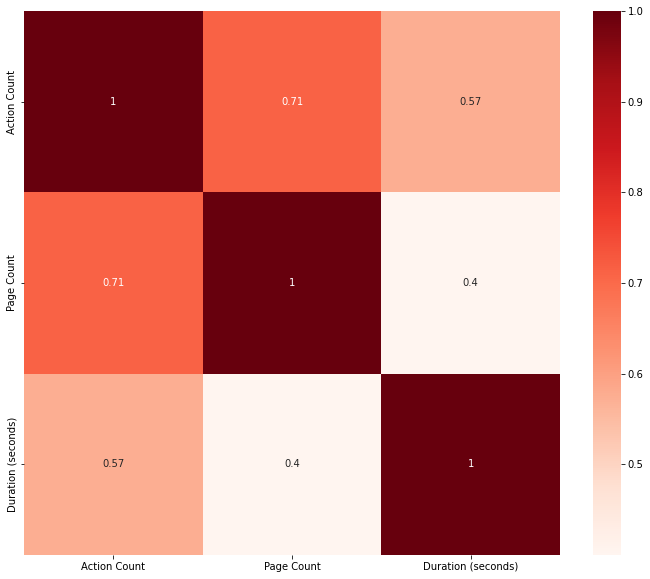

In [98]:
corr = df2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='Reds')

<AxesSubplot:xlabel='New / Returning', ylabel='count'>

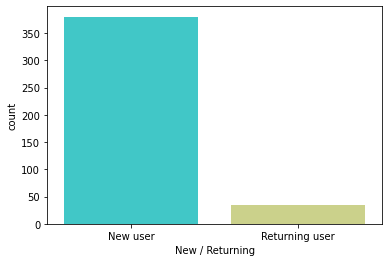

In [99]:
sns.countplot(x = 'New / Returning',data = df2, palette = 'rainbow')

In [100]:
df2['Landing Page URL'].value_counts()

https://app.getbird.bio/the_lean_girl                                                                         106
https://app.getbird.bio/the_flavourist                                                                          3
https://app.getbird.bio/the_lean_girl?fbclid=IwAR1eYSPvNuVzS6lGi4PyC7SM-BVIX43PYZbUfllspNY2sW2yC-C4LhxBAe0      2
https://app.getbird.bio/recipe/gin-gle-bells-grapefruit-cocktail                                                2
https://app.getbird.bio/recipe/cheesy-low-calorie-veggie-bake                                                   2
                                                                                                             ... 
https://app.getbird.bio/the_lean_girl?fbclid=PAAaZuVhTvzVSz5iolwf6Nc7WGl_MB4qamVCfgw6o7aQydigqfZ-mtgQnclxE      1
https://app.getbird.bio/the_lean_girl?fbclid=IwAR1gzk5VMfG2rX_4srsUBwB_bwW0tIGs-lk6hWh-0kVn-O94c4qSURPTau8      1
https://app.getbird.bio/the_lean_girl?fbclid=PAAaZPIOwCR15Rlp4mMtaZyYPSoMri7v58L1Mz-oUYi

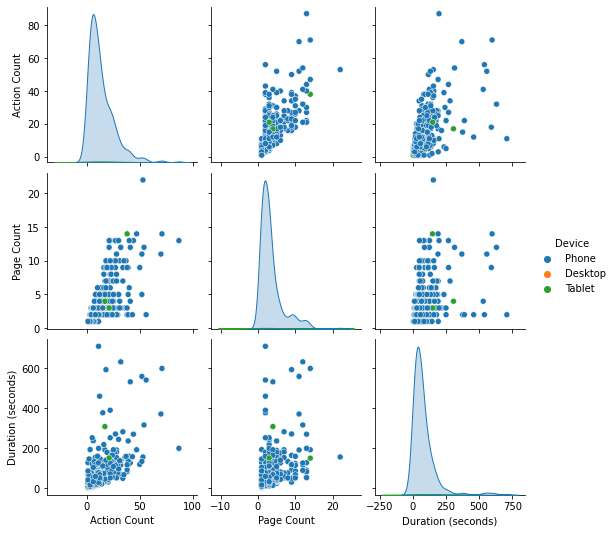

In [101]:
sns.pairplot(df2,hue='Device')

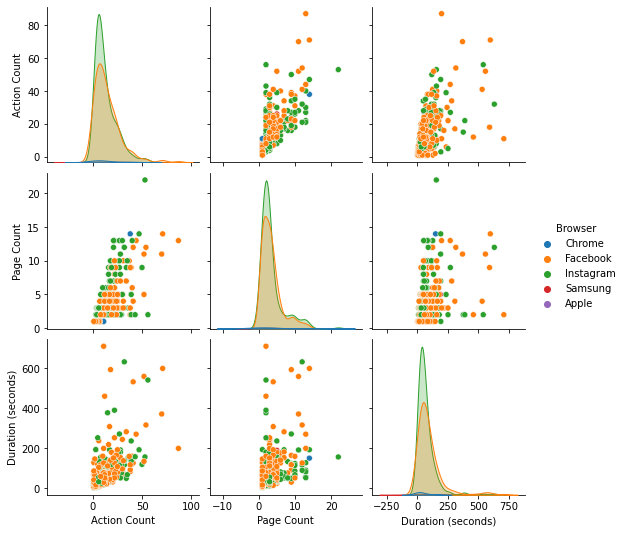

In [102]:
sns.pairplot(df2,hue='Browser')

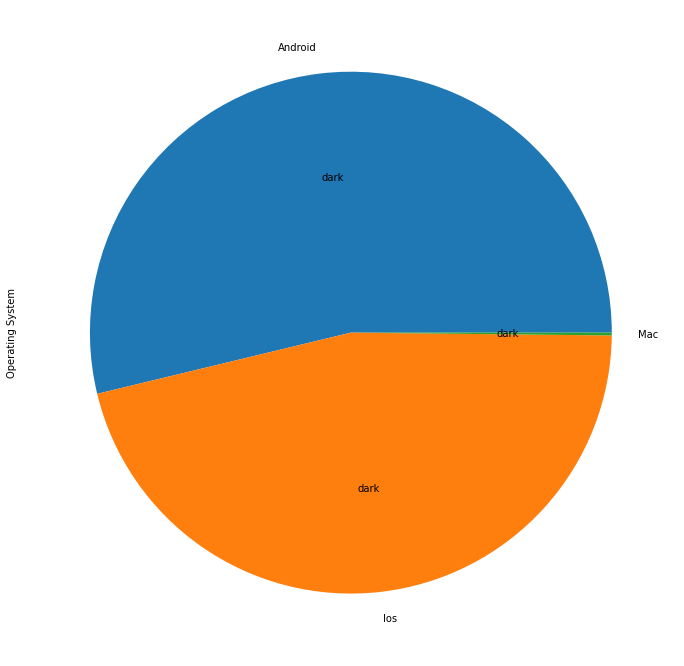

In [103]:
plt.figure(figsize=(15,12))
df['Operating System'].value_counts().plot.pie(autopct='dark')
plt.show()

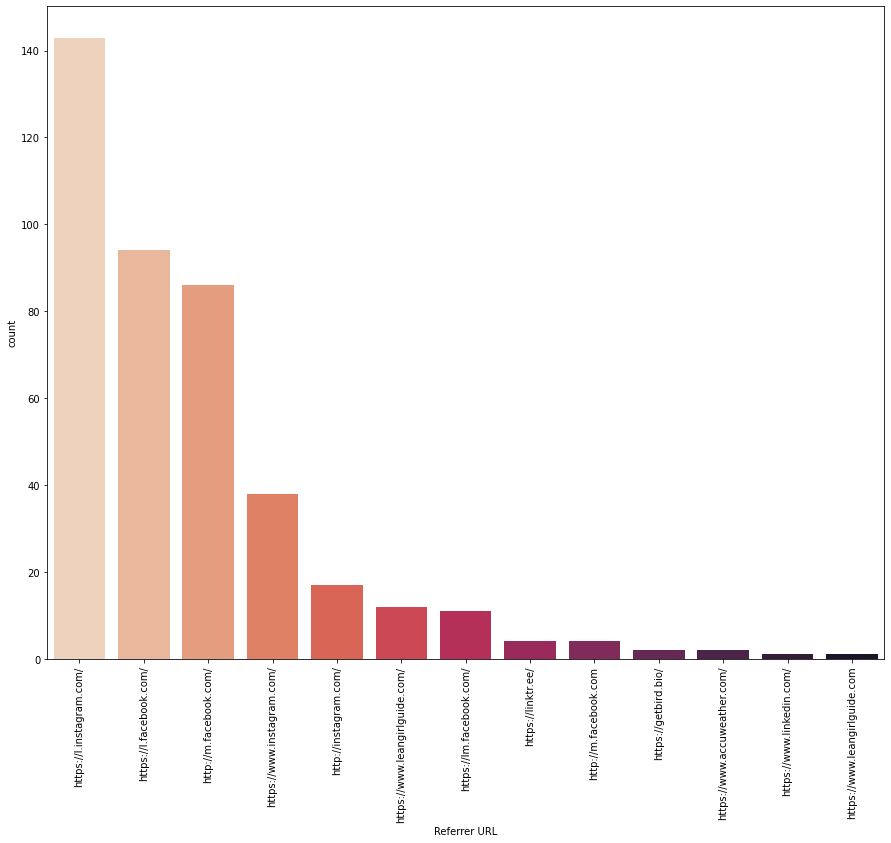

In [104]:
plt.figure(figsize=(15,12))
sns.countplot(x='Referrer URL',data=df2,palette='rocket_r',order=df2['Referrer URL'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

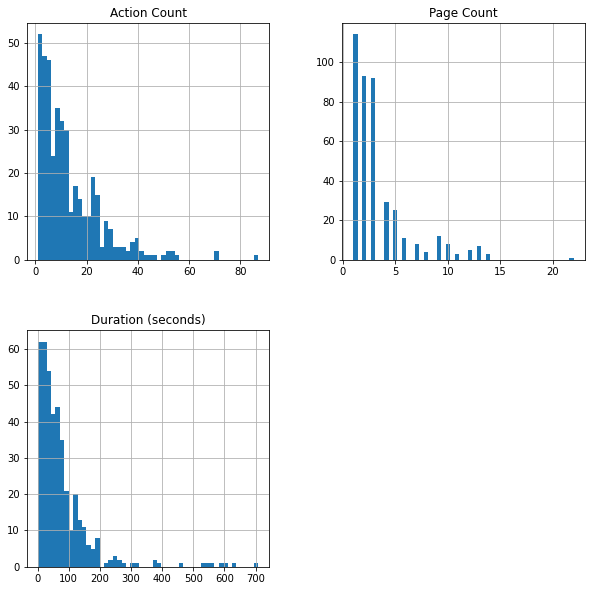

In [105]:
df2.hist(figsize=(10,10),bins=50)
plt.show()

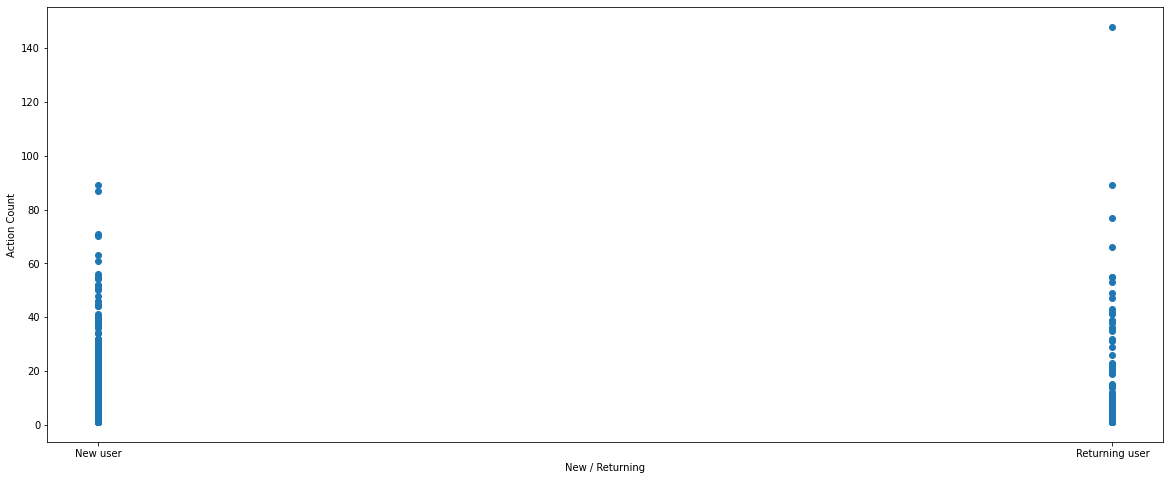

In [106]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['New / Returning'],df['Action Count'])
ax.set_xlabel('New / Returning')
ax.set_ylabel('Action Count')
plt.show()

In [107]:
print(df2.dtypes)

Created               object
New / Returning       object
Hotjar User ID        object
Country               object
Action Count           int64
Page Count             int64
Duration (seconds)     int64
Device                object
Device Screen Size    object
Browser               object
Operating System      object
Referrer URL          object
Landing Page URL      object
Exit Page URL         object
dtype: object


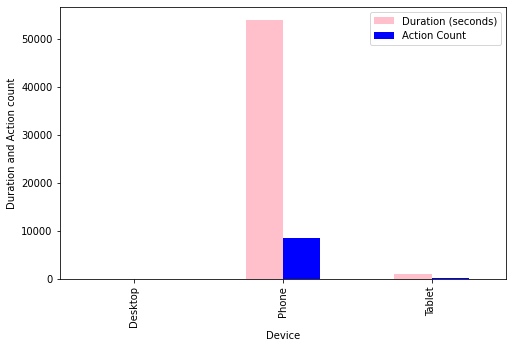

In [108]:
df.groupby('Device')[['Duration (seconds)','Action Count']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Duration and Action count')
plt.show()

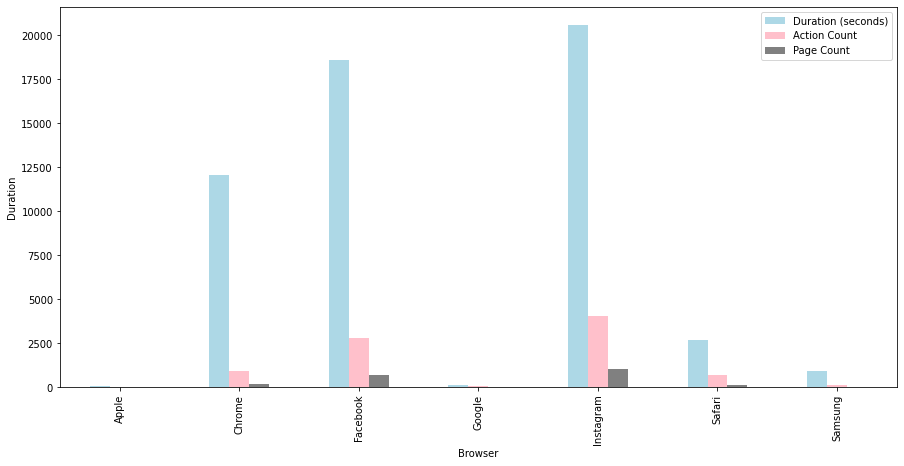

In [109]:
df.groupby('Browser')[['Duration (seconds)','Action Count', 'Page Count']].sum().plot.bar(color=['lightblue','pink','grey'],figsize=(15,7))
plt.ylabel('Duration')
plt.show()

In [114]:
df2['Landing Page URL'] =  df2['Landing Page URL'].str.replace("https://app.getbird.bio/",' ')

c:\users\jmd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\users\jmd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df2.head()

,Created,New / Returning,Hotjar User ID,Country,Action Count,Page Count,Duration (seconds),Device,Device Screen Size,Browser,Operating System,Referrer URL,Landing Page URL,Exit Page URL
2,2022-12-04T09:06:45,New user,c5065b41,ZA,3,1,13,Phone,360 X 643,Chrome,Android,https://linktr.ee/,the_flavourist?utm_medium=social&utm_source=l...,https://app.getbird.bio/the_flavourist?utm_med...
3,2022-12-04T10:02:47,New user,bf1f7067,ZA,4,1,3,Phone,428 X 751,Chrome,Ios,https://getbird.bio/,https://campaign-git-om-whatsapp-otp-sandeepk6...,https://campaign-git-om-whatsapp-otp-sandeepk6...
6,2022-12-04T19:23:35,New user,51bdf75e,ZA,6,3,236,Phone,412 X 793,Facebook,Android,http://m.facebook.com/,the_flavourist,https://app.getbird.bio/the_flavourist
7,2022-12-04T19:00:40,New user,48cecf5a,ZA,19,3,69,Phone,414 X 726,Instagram,Ios,https://www.leangirlguide.com/,the_lean_girl,https://app.getbird.bio/recipe/gin-gle-bells-g...
11,2022-12-04T11:35:17,New user,efb79ae4,ZA,7,3,10,Phone,412 X 741,Facebook,Android,https://lm.facebook.com/,the_lean_girl,https://app.getbird.bio/the_lean_girl


In [117]:
print(df2[['Landing Page URL']].to_string(index=False))

                                                                                                                                                                                                                                      Landing Page URL
                                                                                                                   the_flavourist?utm_medium=social&utm_source=linktree&utm_campaign=learn+how+to+make+cocktails+with+%40the_flavourist+-+julian+short
                                                                                                                                                                            https://campaign-git-om-whatsapp-otp-sandeepk6858.vercel.app/the_lean_girl
                                                                                                                                                                                                                                        the_flavourist
            